In [1]:
import numpy as np
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# 一.2
a = np.array([4 ,5, 6])
type(a), a.shape, a[0]

(numpy.ndarray, (3,), 4)

In [3]:
b = np.array([[4,5,6], [1,2,3]])
for r in range(b.shape[0]):
    print(b.shape[r])
    
b[0,0], b[0,1], b[1,1]

2
3


(4, 5, 2)

In [4]:
# 一.4
c = np.zeros((3, 3))
d = np.ones((4, 5))
e = np.eye(4)
c, d , e

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

In [5]:
# 一.5
f = np.arange(12)
print(f)
f = np.reshape(f, (3, 4))
print(f, f.shape)
print(f[1:], f[:,2:], f[2,-1])

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] (3, 4)
[[ 4  5  6  7]
 [ 8  9 10 11]] [[ 2  3]
 [ 6  7]
 [10 11]] 11


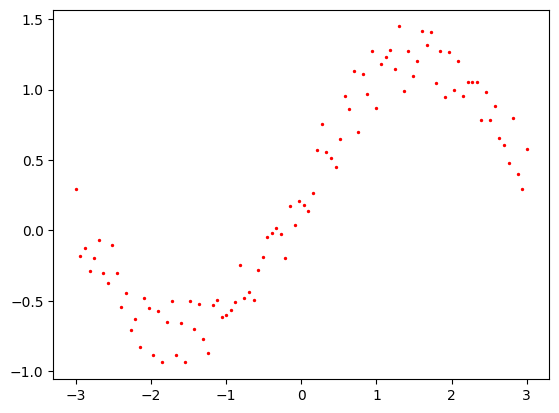

In [6]:
# 第二大题第1题
# 生成带噪音训练数据
num_observations = 100
x = torch.linspace(-3, 3, num_observations)
y = torch.sin(x) + torch.rand((num_observations))*0.5
plt.scatter(x, y, s=2, c='r', label='True')

In [7]:
# 建立模型，为了练习效果，此处不套用nn.Linear与MSELoss，采取手写模型与损失函数，仅使用torch的自动求梯度功能
def caculate_loss(y, y_hat):
    l = torch.pow(y_hat - y, 2)/100
    return l

class Krxk_model():
    # 不继承 nn.Module,采用原始手写
    def __init__(self, x, lr=0.1):
        self.x = x
        self.w = torch.randn((1), requires_grad=True)
        self.b = torch.randn((1), requires_grad=True)
        self.lr = lr
    def forward(self):
        y_hat = self.x*self.w + self.b
        return y_hat
    def zero_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
    def step(self):
        with torch.no_grad():
            self.w -= self.w.grad*self.lr
            self.b -= self.b.grad*self.lr

In [8]:
# 定义模型与超参数
lr = 0.3
model = Krxk_model(x, lr=lr)

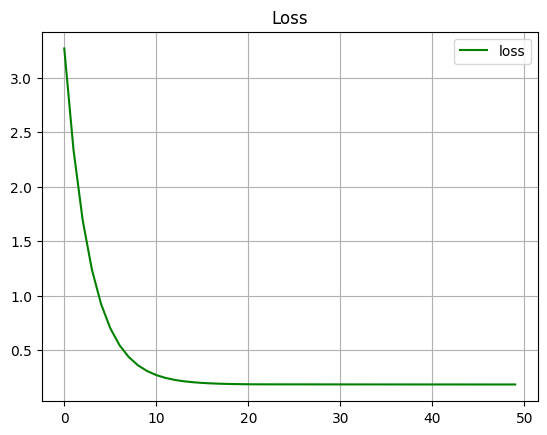

最终损失： 0.18336977064609528


In [9]:
%time
epochs = 50
# 训练并画图显示损失
y_hat = None
l_arr = np.array([])

fig, ax = plt.subplots()
for epoch in range(epochs):
    if epoch > 20:
        model.lr = 0.005
    y_hat = model.forward()
    l = caculate_loss(y, y_hat).sum()
    
    # 简单画图
    ax.cla()
    ax.grid()
    l_arr = np.append(l_arr, l.detach().numpy())
    display.clear_output(wait=True)
    ax.plot(range(l_arr.shape[0]), l_arr, 'g',label='loss') # 此行在ax对象释放时执行输出，故需保证ax不被释放
    ax.set_title('Loss')
    ax.legend()
    display.display(fig)
    plt.pause(0.1)
#     print(f'第{epoch}代：损失: {l}')
    l.backward()
    model.step()
    model.zero_grad()

print('最终损失：', l_arr[-1])

In [10]:
print('w', model.w)
print('b', model.b)

w tensor([0.3484], requires_grad=True)
b tensor([0.2454], requires_grad=True)


In [11]:
torch.save({'w':model.w, 'b':model.b},'./hw_1-single.bin')

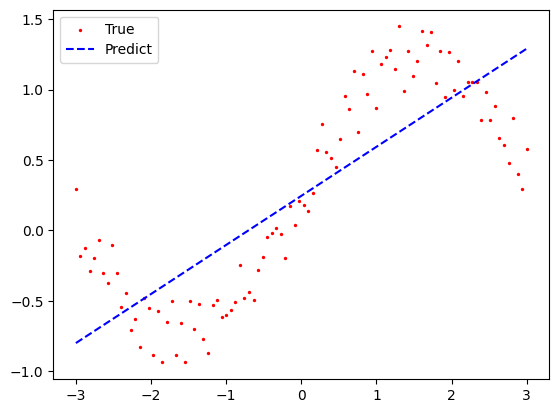

In [12]:
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=2, c='r', label='True')
plt.plot(x.detach().numpy(), y_hat.detach().numpy(), 'b--', label='Predict')
plt.legend()
plt.show()